# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import datetime

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations 
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 602


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
#Set the URL and units and loop variables
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
record_count = 1
set_count = 1
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

#Loop through city list
for i, city in enumerate(cities):
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
        #Delay in order to remain under API limit of 60 requests per minute
        time.sleep(5)

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units={units}"
    #Delay in order to remain under API limit of 60 requests per minute
    time.sleep(1)
        
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1
    try:
        query_url = f"{url}appid={weather_api_key}&q={city}&units={units}"
        weather_response = requests.get(query_url)
        #Set responses to variables
        weather_json = weather_response.json()
        city_lat =  weather_json["coord"]["lat"]
        city_lng = weather_json["coord"]["lon"]
        city_max_temp = weather_json["main"]["temp_max"]
        city_humidity = weather_json["main"]["humidity"]
        city_clouds = weather_json["clouds"]["all"]
        city_wind = weather_json["wind"]["speed"]
        city_country = weather_json["sys"]["country"]
        city_date = weather_json["dt"]
        
        
        #append varilables in city_data
        city_data.append({"City": city, 
                                "Lat": city_lat, 
                                "Lng": city_lng, 
                                "Max Temp": city_max_temp,
                                "Humidity": city_humidity,
                                "Cloudiness": city_clouds,
                                "Wind Speed": city_wind,
                                "Country": city_country,
                                "Date": city_date})
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")



Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | punta arenas
Processing Record 2 of Set 1 | marsh harbour
Processing Record 3 of Set 1 | yellowknife
Processing Record 4 of Set 1 | anadyr
Processing Record 5 of Set 1 | xapuri
Processing Record 6 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 7 of Set 1 | esperance
Processing Record 8 of Set 1 | kapaa
Processing Record 9 of Set 1 | bethel
Processing Record 10 of Set 1 | khatanga
Processing Record 11 of Set 1 | kamuli
Processing Record 12 of Set 1 | bredasdorp
Processing Record 13 of Set 1 | mataura
Processing Record 14 of Set 1 | cape canaveral
Processing Record 15 of Set 1 | tuatapere
Processing Record 16 of Set 1 | norman wells
Processing Record 17 of Set 1 | kavieng
Processing Record 18 of Set 1 | merauke
Processing Record 19 of Set 1 | bluff
Processing Record 20 of Set 1 | carnarvon
Processing Record 21 of Set 1 | chokurdakh
Processing Record 22 of Set 1 | hami
Processing

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          558
Lat           558
Lng           558
Max Temp      558
Humidity      558
Cloudiness    558
Wind Speed    558
Country       558
Date          558
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,punta arenas,-53.1500,-70.9167,20.06,30,75,10.29,CL,1680546333
1,marsh harbour,26.5412,-77.0636,24.66,75,30,3.80,BS,1680546962
2,yellowknife,62.4560,-114.3525,-10.71,62,40,2.06,CA,1680546784
3,anadyr,64.7500,177.4833,-25.72,76,20,5.00,RU,1680546965
4,xapuri,-10.6517,-68.5044,29.31,68,72,1.97,BR,1680546966


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,punta arenas,-53.1500,-70.9167,20.06,30,75,10.29,CL,1680546333
1,marsh harbour,26.5412,-77.0636,24.66,75,30,3.80,BS,1680546962
2,yellowknife,62.4560,-114.3525,-10.71,62,40,2.06,CA,1680546784
3,anadyr,64.7500,177.4833,-25.72,76,20,5.00,RU,1680546965
4,xapuri,-10.6517,-68.5044,29.31,68,72,1.97,BR,1680546966


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

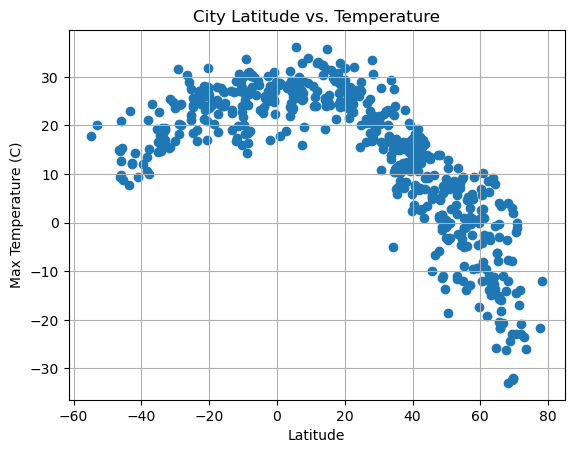

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Temperature")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

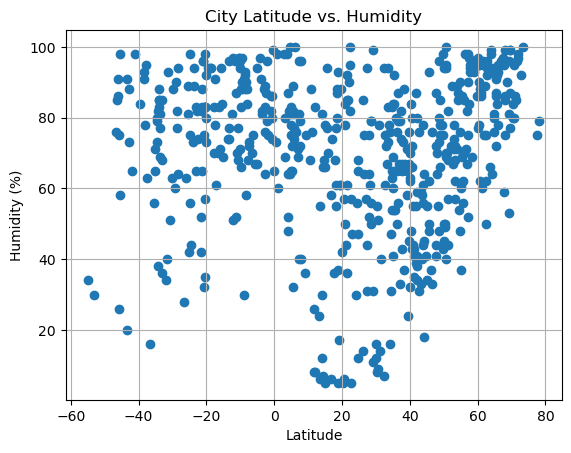

In [9]:
# Build the scatter plots for latitude vs. Humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

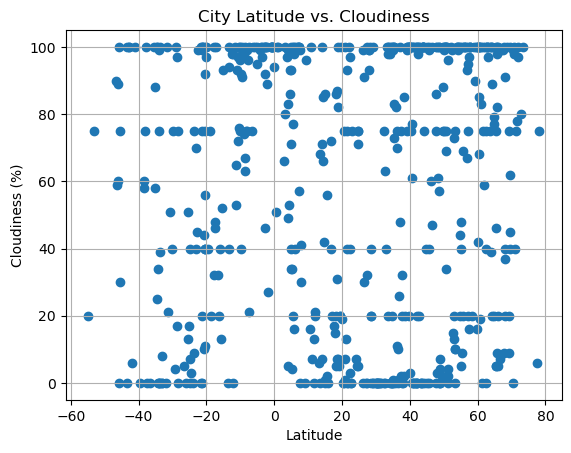

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

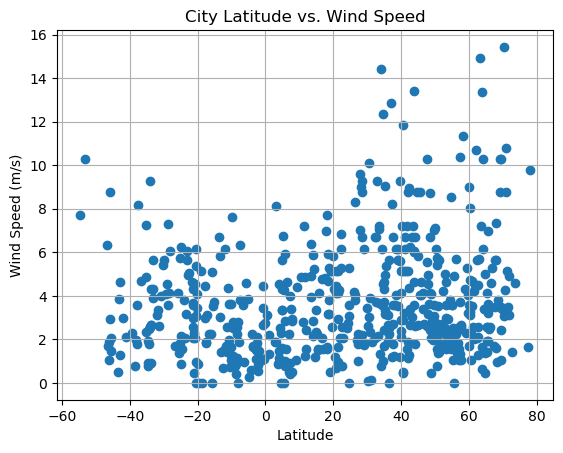

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Incorporate the other graph properties

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots

def linreg(xvalues, yvalues, xlabels, ylabels):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(xvalues, yvalues)
    regress_values = xvalues * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(xvalues,yvalues)
    plt.plot(xvalues,regress_values,"r-")
    plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
    plt.xlabel(xlabels)
    plt.ylabel(ylabels)
    plt.title("The r-value is: " +rvalue.astype(str), loc='left')
    plt.show()    



In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = pd.DataFrame(city_data_df.loc[city_data_df["Lat"]>=0,:])
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,marsh harbour,26.5412,-77.0636,24.66,75,30,3.80,BS,1680546962
2,yellowknife,62.4560,-114.3525,-10.71,62,40,2.06,CA,1680546784
3,anadyr,64.7500,177.4833,-25.72,76,20,5.00,RU,1680546965
6,kapaa,22.0752,-159.3190,22.99,90,100,2.06,US,1680546970
7,bethel,41.3712,-73.4140,14.47,41,0,5.14,US,1680546803


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = pd.DataFrame(city_data_df.loc[city_data_df["Lat"]<=0,:])
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,punta arenas,-53.1500,-70.9167,20.06,30,75,10.29,CL,1680546333
4,xapuri,-10.6517,-68.5044,29.31,68,72,1.97,BR,1680546966
5,esperance,-33.8667,121.9000,18.63,85,99,2.66,AU,1680546969
10,bredasdorp,-34.5322,20.0403,16.76,79,25,1.93,ZA,1680546974
11,mataura,-46.1927,168.8643,14.71,86,89,1.03,NZ,1680546976


###  Temperature vs. Latitude Linear Regression Plot

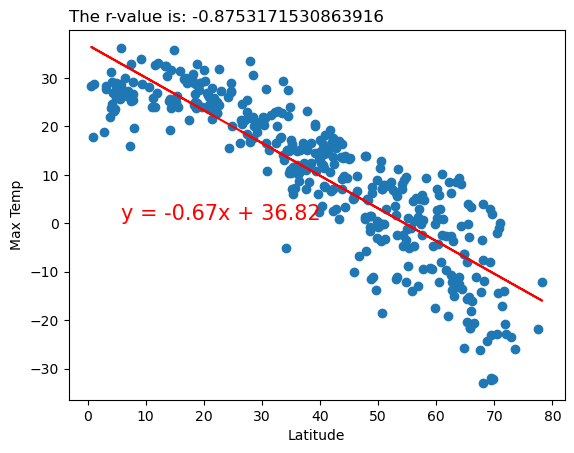

In [15]:
# Linear regression on Northern Hemisphere
linreg(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], "Latitude", "Max Temp")


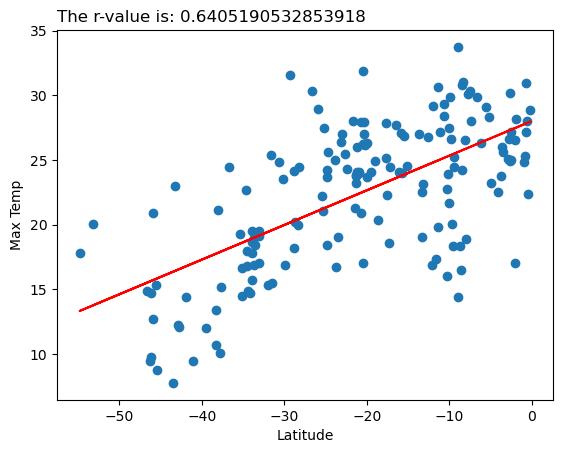

In [16]:
# Linear regression on Southern Hemisphere
linreg(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], "Latitude", "Max Temp")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

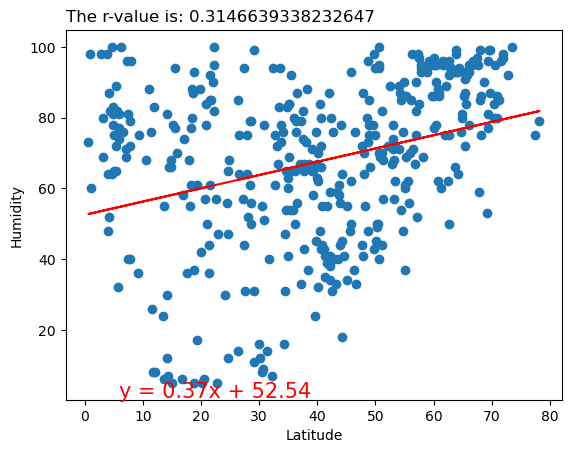

In [17]:
# Northern Hemisphere
linreg(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], "Latitude", "Humidity")

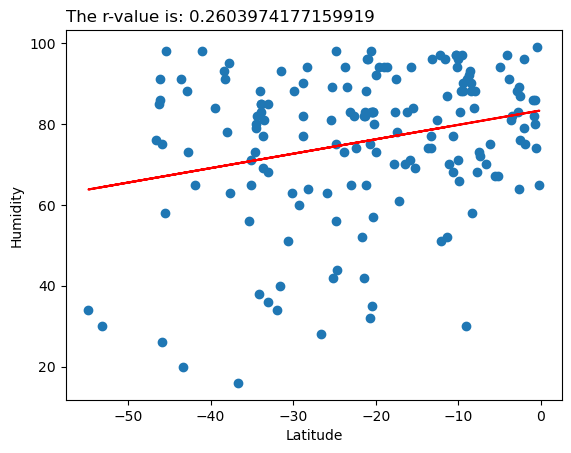

In [18]:
# Southern Hemisphere
linreg(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], "Latitude", "Humidity")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

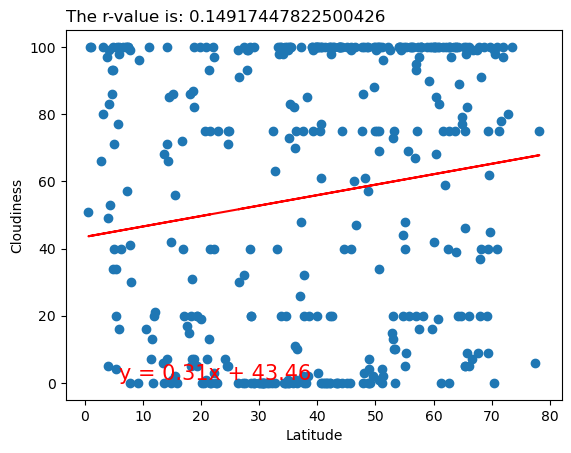

In [19]:
# Northern Hemisphere
linreg(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], "Latitude", "Cloudiness")

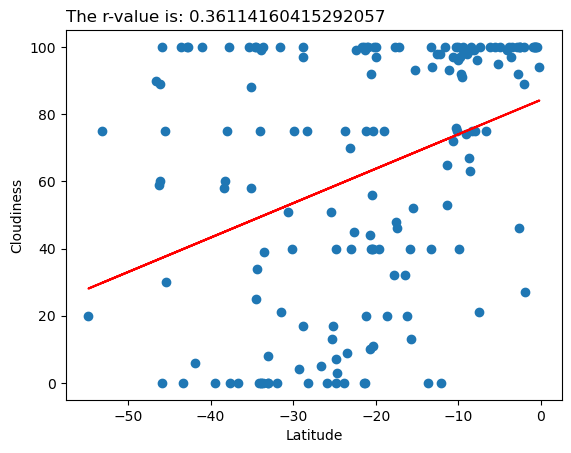

In [20]:
# Southern Hemisphere
linreg(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], "Latitude", "Cloudiness")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

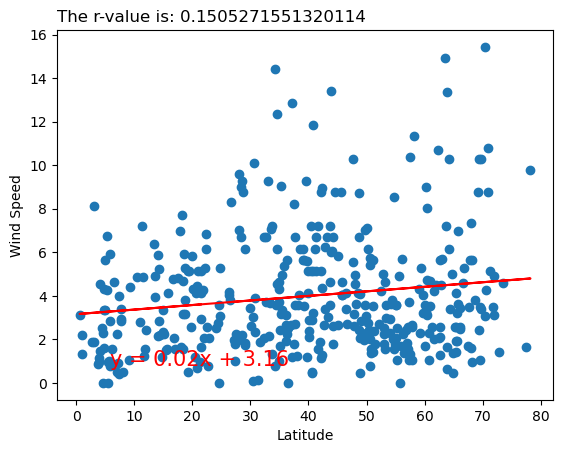

In [21]:
# Northern Hemisphere
linreg(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], "Latitude", "Wind Speed")

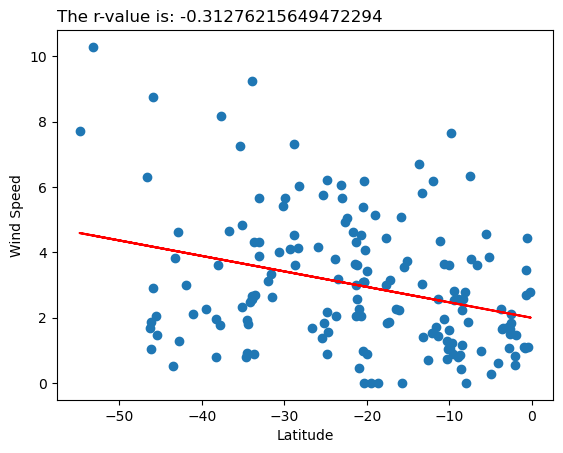

In [22]:
# Southern Hemisphere
linreg(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], "Latitude", "Wind Speed")

**Discussion about the linear relationship:** YOUR RESPONSE HERE